In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#2
df_pd = pd.read_csv('d:/Bigdata/projectdataE.csv', encoding='cp949', header=None)
df_pd.head()

,0,1,2,3,4,5,6,7,8,9
0,-121.97,37.64,32,1283.0,194.0,485.0,171,6.0574,431000,해안에서1시간내
1,-121.99,37.61,9,3666.0,711.0,2341.0,703,4.6458,217000,해안에서1시간내
2,-121.97,37.57,21,4342.0,783.0,2172.0,789,4.6146,247600,해안에서1시간내
3,-121.96,37.58,15,3575.0,597.0,1777.0,559,5.7192,283500,해안에서1시간내
4,-121.98,37.58,20,4126.0,1031.0,2079.0,975,3.6832,216900,해안에서1시간내


In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('SmallProject').getOrCreate()
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled","true")

In [4]:
#3
SPDF = spark.read.csv('hdfs://localhost:9000/SmallProject/projectdataE.csv', header = False, encoding = 'cp949', inferSchema = True)
SPDF.show()

+-------+-----+---+-----+----+----+----+------+------+---------------+
|    _c0|  _c1|_c2|  _c3| _c4| _c5| _c6|   _c7|   _c8|            _c9|
+-------+-----+---+-----+----+----+----+------+------+---------------+
|-121.97|37.64| 32| 1283| 194| 485| 171|6.0574|431000|해안에서1시간내|
|-121.99|37.61|  9| 3666| 711|2341| 703|4.6458|217000|해안에서1시간내|
|-121.97|37.57| 21| 4342| 783|2172| 789|4.6146|247600|해안에서1시간내|
|-121.96|37.58| 15| 3575| 597|1777| 559|5.7192|283500|해안에서1시간내|
|-121.98|37.58| 20| 4126|1031|2079| 975|3.6832|216900|해안에서1시간내|
|-121.99|37.58| 31| 2878| 478|1276| 485|6.2073|282500|해안에서1시간내|
| -122.0|37.58|  6| 4405| 717|2071| 688|5.8151|295600|해안에서1시간내|
|-121.93|37.49|  5| 1150| 311| 648| 245|3.5714|300000|해안에서1시간내|
|-121.99|37.56| 18| 5505|1005|null| 971|   5.0|269700|해안에서1시간내|
|-121.99|37.56| 20| 6462|1294|3288|1235|4.3393|231200|해안에서1시간내|
|-121.96|37.55|  4| 3746| 993|1606| 838|4.1387|162500|해안에서1시간내|
|-121.97|37.56| 13| 8918|1823|4518|1772|4.8052|254000|해안에서1시간내|
|-121.97|37.54| 31|

In [5]:
#4
df_pd.columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']
df_pd.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
0,-121.97,37.64,32,1283.0,194.0,485.0,171,6.0574,431000,해안에서1시간내
1,-121.99,37.61,9,3666.0,711.0,2341.0,703,4.6458,217000,해안에서1시간내
2,-121.97,37.57,21,4342.0,783.0,2172.0,789,4.6146,247600,해안에서1시간내
3,-121.96,37.58,15,3575.0,597.0,1777.0,559,5.7192,283500,해안에서1시간내
4,-121.98,37.58,20,4126.0,1031.0,2079.0,975,3.6832,216900,해안에서1시간내


In [6]:
#5
df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      20640 non-null  float64
 1   V2      20640 non-null  float64
 2   V3      20640 non-null  int64  
 3   V4      20340 non-null  float64
 4   V5      20235 non-null  float64
 5   V6      19940 non-null  float64
 6   V7      20640 non-null  int64  
 7   V8      20640 non-null  float64
 8   V9      20640 non-null  int64  
 9   V10     20640 non-null  object 
dtypes: float64(6), int64(3), object(1)
memory usage: 1.6+ MB


In [7]:
#5
df_pd['V10'] = df_pd['V10'].astype('category')
df_pd['V1'] = df_pd['V1'].astype('float16')
df_pd['V2'] = df_pd['V2'].astype('float16')
df_pd['V3'] = df_pd['V3'].astype('int8')
df_pd['V4'] = df_pd['V4'].astype('float16')
df_pd['V5'] = df_pd['V5'].astype('float16')
df_pd['V6'] = df_pd['V6'].astype('float16')
df_pd['V7'] = df_pd['V7'].astype('int16')
df_pd['V8'] = df_pd['V8'].astype('float16')
df_pd['V9'] = df_pd['V9'].astype('int32')

df_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V1      20640 non-null  float16 
 1   V2      20640 non-null  float16 
 2   V3      20640 non-null  int8    
 3   V4      20340 non-null  float16 
 4   V5      20235 non-null  float16 
 5   V6      19940 non-null  float16 
 6   V7      20640 non-null  int16   
 7   V8      20640 non-null  float16 
 8   V9      20640 non-null  int32   
 9   V10     20640 non-null  category
dtypes: category(1), float16(6), int16(1), int32(1), int8(1)
memory usage: 403.5 KB


In [8]:
#6
df_sp = spark.createDataFrame(df_pd)

C:\Users\SM-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\pyspark\sql\pandas\conversion.py:329: UserWarning: createDataFrame attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  Unsupported type in conversion from Arrow: halffloat
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warnings.warn(msg)
C:\Users\SM-PC\AppData\Local\Programs\Python\Python39\lib\site-packages\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [9]:
#7
df_sp = df_sp.dropna()

In [10]:
#8
df_sp = df_sp.orderBy('V10', 'V9')

In [11]:
#9
df_sp.write.parquet("hdfs://localhost:9000/SmallProject/projectdata.parquet")

Py4JJavaError: An error occurred while calling o63.parquet.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 4 in stage 3.0 failed 1 times, most recent failure: Lost task 4.0 in stage 3.0 (TID 7) (DESKTOP-VA6FM00 executor driver): org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:188)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:108)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:121)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:162)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1491)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	at java.lang.Thread.run(Unknown Source)
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:175)
	... 35 more

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2454)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2403)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2402)
	at scala.collection.immutable.List.foreach(List.scala:333)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2402)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1160)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1160)
	at scala.Option.foreach(Option.scala:437)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1160)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:2642)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2584)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2573)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:938)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2214)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2235)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2254)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2279)
	at org.apache.spark.rdd.RDD.$anonfun$collect$1(RDD.scala:1030)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:414)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:1029)
	at org.apache.spark.RangePartitioner$.sketch(Partitioner.scala:304)
	at org.apache.spark.RangePartitioner.<init>(Partitioner.scala:171)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec$.prepareShuffleDependency(ShuffleExchangeExec.scala:293)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.shuffleDependency$lzycompute(ShuffleExchangeExec.scala:173)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.shuffleDependency(ShuffleExchangeExec.scala:167)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.mapOutputStatisticsFuture$lzycompute(ShuffleExchangeExec.scala:143)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.mapOutputStatisticsFuture(ShuffleExchangeExec.scala:139)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeLike.$anonfun$submitShuffleJob$1(ShuffleExchangeExec.scala:68)
	at org.apache.spark.sql.execution.SparkPlan.$anonfun$executeQuery$1(SparkPlan.scala:223)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.sql.execution.SparkPlan.executeQuery(SparkPlan.scala:220)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeLike.submitShuffleJob(ShuffleExchangeExec.scala:68)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeLike.submitShuffleJob$(ShuffleExchangeExec.scala:67)
	at org.apache.spark.sql.execution.exchange.ShuffleExchangeExec.submitShuffleJob(ShuffleExchangeExec.scala:115)
	at org.apache.spark.sql.execution.adaptive.ShuffleQueryStageExec.shuffleFuture$lzycompute(QueryStageExec.scala:170)
	at org.apache.spark.sql.execution.adaptive.ShuffleQueryStageExec.shuffleFuture(QueryStageExec.scala:170)
	at org.apache.spark.sql.execution.adaptive.ShuffleQueryStageExec.doMaterialize(QueryStageExec.scala:172)
	at org.apache.spark.sql.execution.adaptive.QueryStageExec.materialize(QueryStageExec.scala:82)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$5(AdaptiveSparkPlanExec.scala:258)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$5$adapted(AdaptiveSparkPlanExec.scala:256)
	at scala.collection.immutable.Vector.foreach(Vector.scala:1856)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.$anonfun$getFinalPhysicalPlan$1(AdaptiveSparkPlanExec.scala:256)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.getFinalPhysicalPlan(AdaptiveSparkPlanExec.scala:228)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.withFinalPlanUpdate(AdaptiveSparkPlanExec.scala:370)
	at org.apache.spark.sql.execution.adaptive.AdaptiveSparkPlanExec.finalPhysicalPlan(AdaptiveSparkPlanExec.scala:220)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.materializeAdaptiveSparkPlan$1(FileFormatWriter.scala:168)
	at org.apache.spark.sql.execution.datasources.FileFormatWriter$.write(FileFormatWriter.scala:171)
	at org.apache.spark.sql.execution.datasources.InsertIntoHadoopFsRelationCommand.run(InsertIntoHadoopFsRelationCommand.scala:186)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult$lzycompute(commands.scala:113)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.sideEffectResult(commands.scala:111)
	at org.apache.spark.sql.execution.command.DataWritingCommandExec.executeCollect(commands.scala:125)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.$anonfun$applyOrElse$1(QueryExecution.scala:97)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$5(SQLExecution.scala:103)
	at org.apache.spark.sql.execution.SQLExecution$.withSQLConfPropagated(SQLExecution.scala:163)
	at org.apache.spark.sql.execution.SQLExecution$.$anonfun$withNewExecutionId$1(SQLExecution.scala:90)
	at org.apache.spark.sql.SparkSession.withActive(SparkSession.scala:775)
	at org.apache.spark.sql.execution.SQLExecution$.withNewExecutionId(SQLExecution.scala:64)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:97)
	at org.apache.spark.sql.execution.QueryExecution$$anonfun$eagerlyExecuteCommands$1.applyOrElse(QueryExecution.scala:93)
	at org.apache.spark.sql.catalyst.trees.TreeNode.$anonfun$transformDownWithPruning$1(TreeNode.scala:481)
	at org.apache.spark.sql.catalyst.trees.CurrentOrigin$.withOrigin(TreeNode.scala:82)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDownWithPruning(TreeNode.scala:481)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.org$apache$spark$sql$catalyst$plans$logical$AnalysisHelper$$super$transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning(AnalysisHelper.scala:267)
	at org.apache.spark.sql.catalyst.plans.logical.AnalysisHelper.transformDownWithPruning$(AnalysisHelper.scala:263)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.plans.logical.LogicalPlan.transformDownWithPruning(LogicalPlan.scala:30)
	at org.apache.spark.sql.catalyst.trees.TreeNode.transformDown(TreeNode.scala:457)
	at org.apache.spark.sql.execution.QueryExecution.eagerlyExecuteCommands(QueryExecution.scala:93)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted$lzycompute(QueryExecution.scala:80)
	at org.apache.spark.sql.execution.QueryExecution.commandExecuted(QueryExecution.scala:78)
	at org.apache.spark.sql.execution.QueryExecution.assertCommandExecuted(QueryExecution.scala:115)
	at org.apache.spark.sql.DataFrameWriter.runCommand(DataFrameWriter.scala:848)
	at org.apache.spark.sql.DataFrameWriter.saveToV1Source(DataFrameWriter.scala:382)
	at org.apache.spark.sql.DataFrameWriter.saveInternal(DataFrameWriter.scala:355)
	at org.apache.spark.sql.DataFrameWriter.save(DataFrameWriter.scala:239)
	at org.apache.spark.sql.DataFrameWriter.parquet(DataFrameWriter.scala:781)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(Unknown Source)
	at java.lang.reflect.Method.invoke(Unknown Source)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Unknown Source)
Caused by: org.apache.spark.SparkException: Python worker failed to connect back.
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:188)
	at org.apache.spark.api.python.PythonWorkerFactory.create(PythonWorkerFactory.scala:108)
	at org.apache.spark.SparkEnv.createPythonWorker(SparkEnv.scala:121)
	at org.apache.spark.api.python.BasePythonRunner.compute(PythonRunner.scala:162)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:65)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:373)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:337)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:90)
	at org.apache.spark.scheduler.Task.run(Task.scala:131)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$3(Executor.scala:506)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:1491)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:509)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(Unknown Source)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(Unknown Source)
	... 1 more
Caused by: java.net.SocketTimeoutException: Accept timed out
	at java.net.DualStackPlainSocketImpl.waitForNewConnection(Native Method)
	at java.net.DualStackPlainSocketImpl.socketAccept(Unknown Source)
	at java.net.AbstractPlainSocketImpl.accept(Unknown Source)
	at java.net.PlainSocketImpl.accept(Unknown Source)
	at java.net.ServerSocket.implAccept(Unknown Source)
	at java.net.ServerSocket.accept(Unknown Source)
	at org.apache.spark.api.python.PythonWorkerFactory.createSimpleWorker(PythonWorkerFactory.scala:175)
	... 35 more


In [12]:
#10
df_Nname = df_pd.select_dtypes(include=np.number).columns.tolist()
df_Nname

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']

In [13]:
#11
df_pd.isna().sum()

V1       0
V2       0
V3       0
V4     300
V5     405
V6     700
V7       0
V8       0
V9       0
V10      0
dtype: int64

In [14]:
#12
df_sub = df_pd[(df_pd['V3'] > 50) & (df_pd['V8'] < 2)]
df_sub

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10
919,-118.1875,34.12500,52,1081.0,311.0,904.0,283,1.921875,165100,해안에서1시간내
1085,-118.3125,34.09375,52,1272.0,322.0,984.0,353,1.906250,261600,해안에서1시간내
1325,-118.1875,34.03125,52,583.0,157.0,730.0,174,1.411133,140600,해안에서1시간내
1335,-118.2500,34.03125,52,116.0,107.0,171.0,92,1.077148,112500,해안에서1시간내
1339,-118.2500,34.06250,52,2806.0,1944.0,2232.0,1605,0.677734,350000,해안에서1시간내
...,...,...,...,...,...,...,...,...,...,...
20079,-122.3750,37.75000,52,248.0,68.0,124.0,51,1.488281,450000,만근처
20089,-122.4375,37.75000,52,1427.0,281.0,620.0,236,1.994141,262500,만근처
20128,-122.4375,37.75000,52,831.0,175.0,415.0,159,1.946289,249000,만근처
20589,-122.2500,38.12500,52,793.0,216.0,505.0,194,1.966797,93800,만근처


In [15]:
#13
from sklearn.impute import KNNImputer

replace = KNNImputer(n_neighbors=5, weights='uniform')
df_pd['V4'] = replace.fit_transform(df_pd[df_Nname])
df_pd.isna().sum()

V1       0
V2       0
V3       0
V4       0
V5     405
V6     700
V7       0
V8       0
V9       0
V10      0
dtype: int64

In [16]:
#14
df_pd['V5'] = df_pd.groupby('V10', group_keys=False)['V5'].apply(lambda x: x.fillna(x.mean()))
df_pd.isna().sum()                           

V1       0
V2       0
V3       0
V4       0
V5       0
V6     700
V7       0
V8       0
V9       0
V10      0
dtype: int64

In [17]:
#15
df_pd['P'] = pd.qcut(df_pd['V6'], q = 4, labels=['C1', 'C2', 'C3', 'C4'])

print(df_pd['P'].describe())
df_pd.head()

count     19940
unique        4
top          C1
freq       4995
Name: P, dtype: object


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,P
0,-122.0000,37.62500,32,-122.0000,194.0,485.0,171,6.058594,431000,해안에서1시간내,C1
1,-122.0000,37.62500,9,-122.0000,711.0,2340.0,703,4.644531,217000,해안에서1시간내,C4
2,-122.0000,37.56250,21,-122.0000,783.0,2172.0,789,4.613281,247600,해안에서1시간내,C4
3,-121.9375,37.59375,15,-121.9375,597.0,1777.0,559,5.718750,283500,해안에서1시간내,C4
4,-122.0000,37.59375,20,-122.0000,1031.0,2080.0,975,3.683594,216900,해안에서1시간내,C4


In [18]:
#16
df_pd['S'] = df_pd.groupby('V10', group_keys=False)['V9'].apply(lambda x:(x-x.mean())/x.std())
df_pd.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,P,S
0,-122.0000,37.62500,32,-122.0000,194.0,485.0,171,6.058594,431000,해안에서1시간내,C1,1.798982
1,-122.0000,37.62500,9,-122.0000,711.0,2340.0,703,4.644531,217000,해안에서1시간내,C4,-0.217521
2,-122.0000,37.56250,21,-122.0000,783.0,2172.0,789,4.613281,247600,해안에서1시간내,C4,0.070820
3,-121.9375,37.59375,15,-121.9375,597.0,1777.0,559,5.718750,283500,해안에서1시간내,C4,0.409103
4,-122.0000,37.59375,20,-122.0000,1031.0,2080.0,975,3.683594,216900,해안에서1시간내,C4,-0.218464


In [19]:
#17
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
df_dummy = encoder.fit_transform(df_pd[['V10']])
df_dummy = pd.DataFrame(df_dummy.toarray(), index=df_pd.index)
df_dummy.head()

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0


In [20]:
#18
df_pd = pd.concat([df_pd, df_dummy], axis=1)
df_pd.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,P,S,0,1,2,3,4
0,-122.0000,37.62500,32,-122.0000,194.0,485.0,171,6.058594,431000,해안에서1시간내,C1,1.798982,0.0,0.0,0.0,0.0,1.0
1,-122.0000,37.62500,9,-122.0000,711.0,2340.0,703,4.644531,217000,해안에서1시간내,C4,-0.217521,0.0,0.0,0.0,0.0,1.0
2,-122.0000,37.56250,21,-122.0000,783.0,2172.0,789,4.613281,247600,해안에서1시간내,C4,0.070820,0.0,0.0,0.0,0.0,1.0
3,-121.9375,37.59375,15,-121.9375,597.0,1777.0,559,5.718750,283500,해안에서1시간내,C4,0.409103,0.0,0.0,0.0,0.0,1.0
4,-122.0000,37.59375,20,-122.0000,1031.0,2080.0,975,3.683594,216900,해안에서1시간내,C4,-0.218464,0.0,0.0,0.0,0.0,1.0


In [21]:
#19
df_pd.groupby(['V10', 'P']).agg({'V1':['mean', 'std'], 'V2':['mean', 'std']})

V1                   V2          
                   mean       std       mean       std
V10      P                                            
ISLAND   C1 -118.359375  0.093750  33.367188  0.046875
         C2 -118.312500       NaN  33.343750       NaN
         C3         NaN       NaN        NaN       NaN
         C4         NaN       NaN        NaN       NaN
내륙       C1 -120.007469  1.930094  37.150028  2.119004
         C2 -119.863708  1.842754  36.920475  2.086254
         C3 -119.622620  1.817797  36.545109  2.025924
         C4 -119.360275  1.926971  36.201786  2.098760
만근처      C1 -122.248428  0.137382  37.799072  0.187575
         C2 -122.260269  0.145879  37.788536  0.172092
         C3 -122.281616  0.158760  37.805233  0.185947
         C4 -122.249191  0.164439  37.815723  0.205085
해안근처     C1 -119.630562  2.387686  34.998962  2.316215
         C2 -119.426102  2.442025  34.868107  2.455444
         C3 -119.137177  2.252966  34.550846  2.223923
         C4 -119.126099  2.157716  34.517879  2.010719
해안에서1시간내 C1 -118.916435  1.638534  34.616837  1.547294
         C2 -118.866829  1.606932  34.576515  1.518199
         C3 -118.824150  1.574383  34.535141  1.435175
         C4 -118.794479  1.542778  34.523197  1.386762

In [22]:
#20
df_pd = df_pd.dropna(subset=['V6', 'P'])
df_pd.isna().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
P      0
S      0
0      0
1      0
2      0
3      0
4      0
dtype: int64

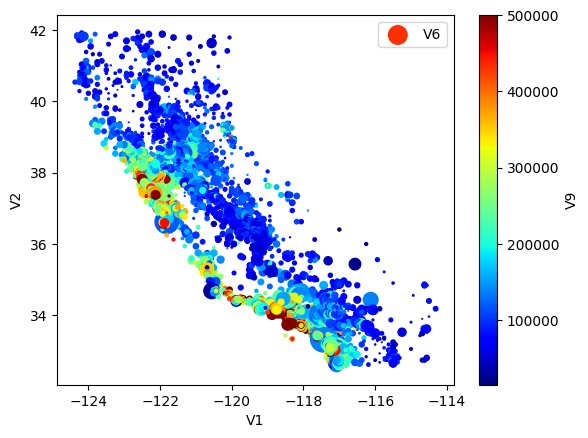

In [23]:
#20
df_pd.plot(kind='scatter', 
           x='V1',
           y='V2',
           s=df_pd['V6']/100,
           label='V6',
           c='V9',
           cmap=plt.get_cmap('jet'))
plt.legend()
plt.show()